## Preproccesing Data (Extracting Data)
### Meteorite Data

In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read Meteorite data and sort them by yeras
df_meteorite = pd.read_csv("Meteorite_Landings.csv").sort_values(by=['year'])

# drop rows with NAN value
df_meteorite = df_meteorite.dropna()

# drop unnecessary columns
##### GeoLocation - reclat and reclong exsits
##### nametype & id - not needed
df_meteorite = df_meteorite.drop(columns={'GeoLocation', 'nametype', 'id'})

# Change the format of date MM/DD/YYYY to YYYY
df_meteorite['year'] = df_meteorite['year'].str.slice(6, 10)

print("Number of observations: " + str(df_meteorite.shape[0]))
df_meteorite.head()

Number of observations: 38116


,name,recclass,mass (g),fall,year,reclat,reclong
174,Castrovillari,Stone-uncl,15000.0,Fell,1583,39.80000,16.20000
26166,Morito,"Iron, IIIAB",10100000.0,Found,1600,27.05000,-105.43333
410,Jalandhar,Iron,1967.0,Fell,1621,31.00000,75.00000
956,Stretchleigh,Stone-uncl,10400.0,Fell,1623,50.38333,-3.95000
369,Hatford,Stone-uncl,29000.0,Fell,1628,51.65000,-1.51667


<hr />

### Natural Disaster Data


In [275]:
# Read Natural Disaster data
# ND = Natural Disaster
df_ndisaster = pd.read_csv("natural_disaster.csv")
df_ndisaster.shape

(48390, 16)

In [276]:
# Create new dateframe with only necessary columns
df_ndisaster = pd.DataFrame({'Year':df_ndisaster['Incident Begin Date'],
                   'Incident Type':df_ndisaster['Incident Type'], 
                   'Title':df_ndisaster['Title'],
                   'Declared County':df_ndisaster['Declared County/Area']})

df_ndisaster['Year'] = (pd.to_datetime(df_ndisaster['Year'])).dt.year
# drop any row with NAN value
df_ndisaster = df_ndisaster.dropna()

print("Number of observations: " + str(df_ndisaster.shape[0]))

df_ndisaster.head()

Number of observations: 48193


,Year,Incident Type,Title,Declared County
0,2018,Fire,WILDFIRES,Butte (County)
1,2018,Fire,WILDFIRES,Los Angeles (County)
2,2018,Fire,WILDFIRES,Ventura (County)
3,2018,Fire,WILDFIRES,Butte (County)
4,2018,Fire,WILDFIRES,Los Angeles (County)


### <hr />

## Observing Data

### Observe number of natural disasters occured each year (1959 ~ 2013)

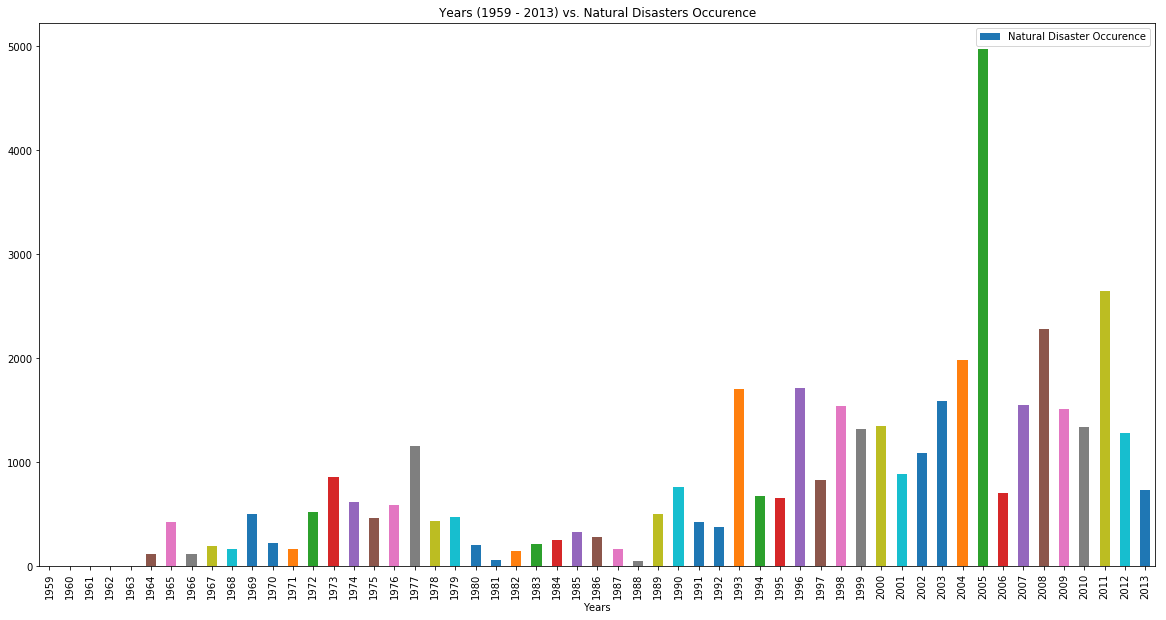

In [277]:
# Sort natural disaster data frame by type of disasters
df_ndisaster = df_ndisaster.sort_values(by=['Year'])

# Count number of disasters occured per year
years = df_ndisaster['Year'].values

minYear = years[0]
maxYear = 2013
years_freq_nd = [0] * (maxYear - minYear + 1)

for x in years:
    if(x>maxYear):
        break
    years_freq_nd[x-minYear] = years_freq_nd[x-minYear] + 1

# 1960, 61, 62,, and 63 doesn't exist in original, 
# so i'm going to create new datafram with these years included
years = []
{years.append(x) for x in range(minYear, maxYear+1)}

df_years_vs_nd = pd.DataFrame({'Years':years, 'Natural Disaster Occurence':years_freq_nd})
df_years_vs_nd.plot(x='Years', y='Natural Disaster Occurence', kind='bar', figsize=(20,10),
             title="Years (1959 - 2013) vs. Natural Disasters Occurence")

> The above graph shows the year 2005 had far more number of natural disasters compare to any other yeras. [Was 2005 the year of natural disasters?](http://www.who.int/bulletin/volumes/84/1/news10106/en/)

<hr />

### Observe number of meteorite impacts occured each year (1959 ~ 2013)

[Meteorites, Impcats, and Mass Extinction](http://www.tulane.edu/~sanelson/Natural_Disasters/impacts.htm)

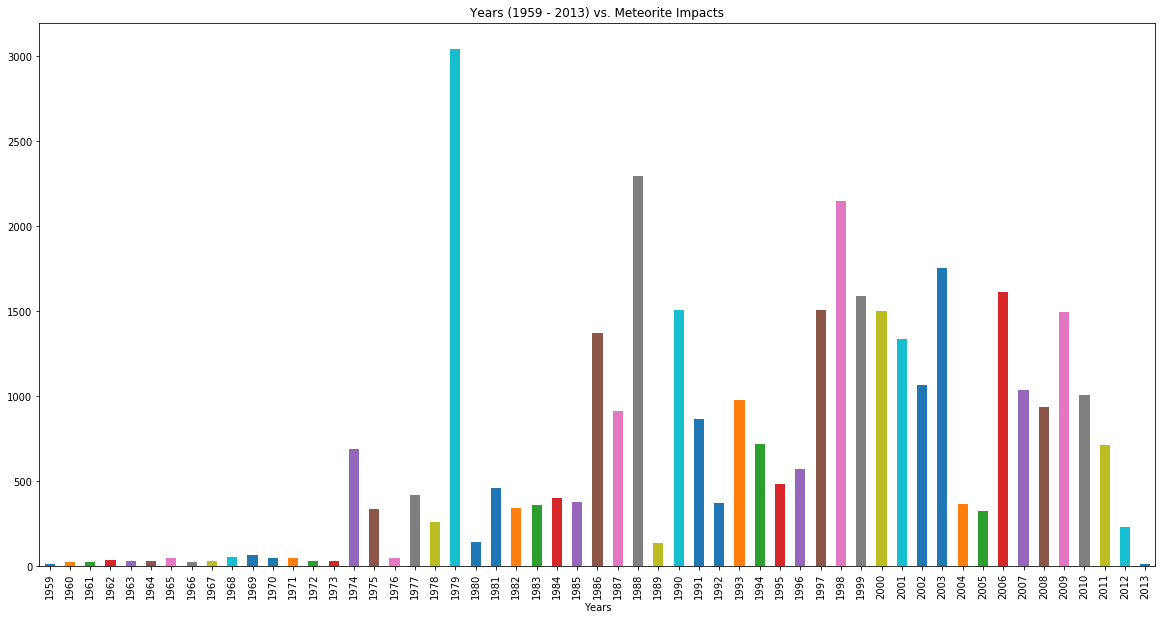

In [278]:
years_freq_meteo = [0] * (maxYear - minYear + 1)

for x in (pd.DataFrame({'Year':df_meteorite['year']})).values:
    if int(x) >= minYear and int(x) <= maxYear:
        years_freq_meteo[int(x)-minYear] = years_freq_meteo[int(x)-minYear] + 1

df_years_vs_meteo = pd.DataFrame({'Years':years, 'Num. of Meteorite Impacts':years_freq_meteo})
df_years_vs_meteo.plot(x='Years', y='Num. of Meteorite Impacts', kind='bar', figsize=(20,10),
             title="Years (1959 - 2013) vs. Meteorite Impacts", legend=False)

## Plot NDO and MIO side by side

NDO : Natural Disaster Occurence

MIO : Meteroite Impact Occurence

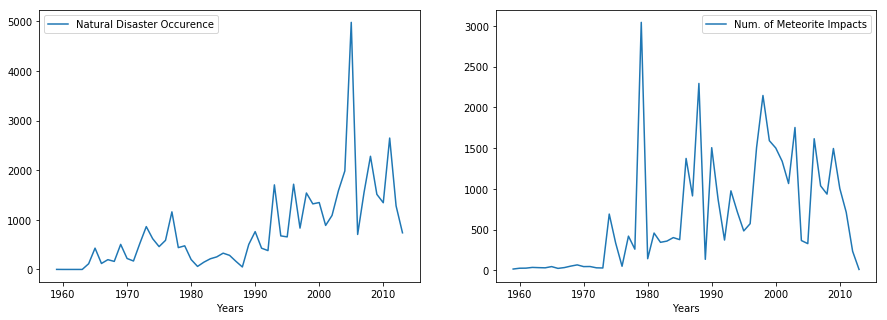

In [279]:
fig, axs = plt.subplots(1,2)

df_years_vs_nd.plot(ax=axs[0], x='Years', y='Natural Disaster Occurence', kind='line', figsize=(15, 5))
df_years_vs_meteo.plot(ax=axs[1], x='Years', y='Num. of Meteorite Impacts', kind='line', figsize=(15, 5))

# Geographic Plot

In [280]:
ndo = df_years_vs_nd[(df_years_vs_nd['Years'][:] >= 1959) & (df_years_vs_nd['Years'][:] <= 2013)]
# plt.loglog(df_years_vs_nd['Years'], ndo['Natural Disaster Occurence'], '.')

In [281]:
# type cast string year to int
df_meteorite['year'] = df_meteorite['year'].apply(lambda x: int(x))

# grab coulmns whose years are btwn 1959 and 2013
df_m = df_meteorite[(df_meteorite['year'][:] >= 1959) & (df_meteorite['year'][:] <= 2013)]

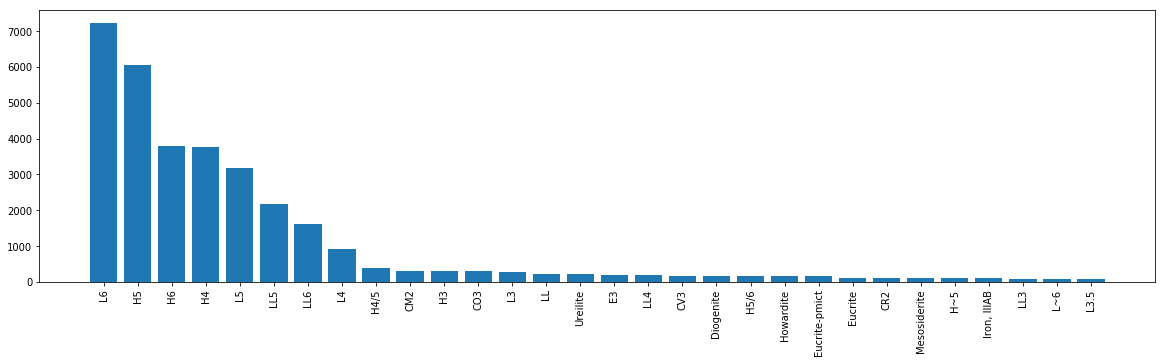

In [282]:
# plot meteorite classification
plt.figure(figsize=(20,5))
plt.bar(df_m['recclass'].value_counts().index[0:30], df_m['recclass'].value_counts().values[0:30])
_ = plt.xticks(rotation=90)

In [283]:
# remove reclong/reclat with value == 0
df_m = df_m[df_m['reclong'] != 0]
df_m = df_m[df_m['reclat'] != 0]

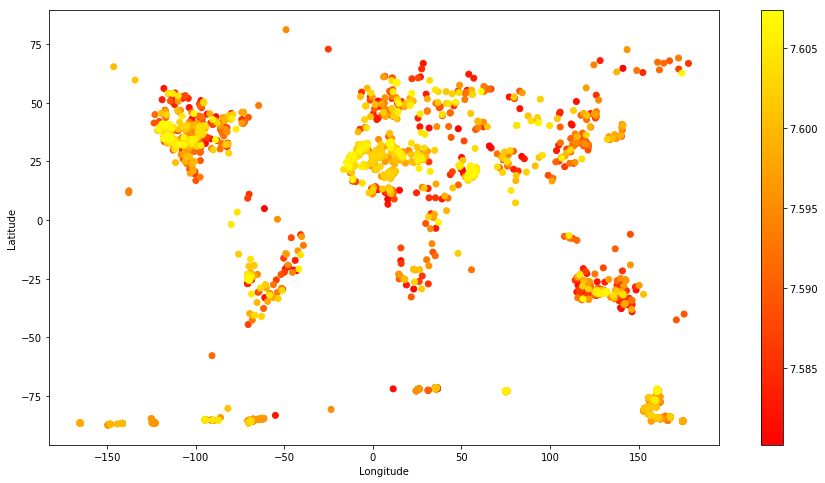

In [284]:
ndo = ndo.rename(columns={'Years': 'year'})

color_yr = [np.log(year) for year in df_m['year']]

plt.figure(figsize=(15,8))
plt.scatter(df_m['reclong'], df_m['reclat'],
            c=color_yr, cmap=plt.cm.autumn)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [285]:
# color_mass = [np.log(mass) for mass in df_m['mass (g)']]

color_mass = []

for mass in df_m['mass (g)']:
    if mass == 0:
        color_mass.append(np.log(1))
    elif mass != 0:
        color_mass.append(np.log(mass))

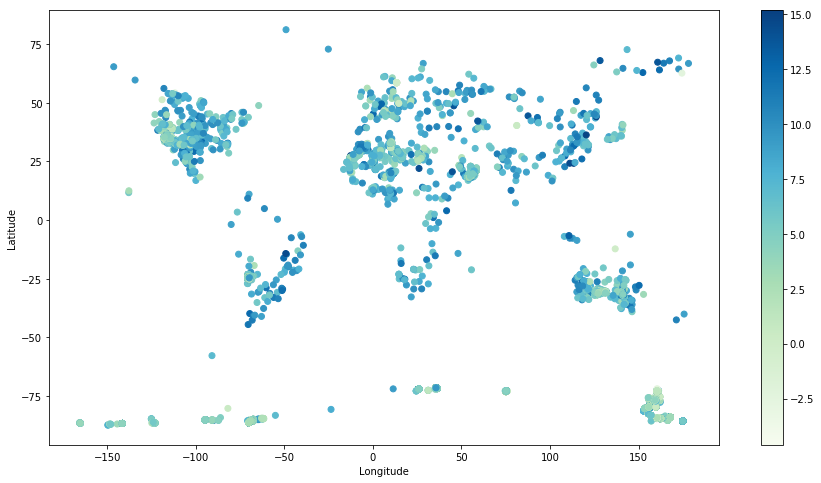

In [286]:
plt.figure(figsize=(15,8))
plt.scatter(df_m['reclong'], df_m['reclat'],
            c=color_mass, cmap=plt.cm.GnBu)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Finalized DataFrame

In [287]:
df_final = pd.DataFrame({
        'years':df_years_vs_nd['Years'],
        'ndo':df_years_vs_nd['Natural Disaster Occurence'],
        'mio':df_years_vs_meteo['Num. of Meteorite Impacts']})

avg_mass = []
max_mass = []
class_name = []
max_count = []

for year in years:
    avg_mass.append(np.mean(df_m['mass (g)'][df_m['year']==year].values))
    max_mass.append(max(df_m['mass (g)'][df_m['year']==year].values))
    max_count.append(df_m.recclass[df_m['year']==year].value_counts()[0])
    class_name.append(df_m.recclass[df_m['year']==year].value_counts().index[0])
    
df_final['class_name'] = pd.DataFrame({'class_name':class_name})
df_final['max_count'] = pd.DataFrame({'max_count':max_count})
df_final['avg_mass'] = pd.DataFrame({'avg_mass':avg_mass})
df_final['max_mass'] = pd.DataFrame({'max_mass':max_mass})

df_final.head()

# years      -> years 1959~2013
# ndo        -> natural disaster occurence
# mio        -> meteorite impact occurence 
# class_name -> classified name of meteorite with most occurence in that year
# max_count  -> above meteorite's max occurence number
# avg_mass   -> average meteorite mass in that year
# max_mass   -> largest meteorite fell in that year

,years,ndo,mio,class_name,max_count,avg_mass,max_mass
0,1959,1,16,L6,3,28211.393750,200000.0
1,1960,0,26,L6,4,31268.276923,330000.0
2,1961,0,27,H5,7,22980.240741,283000.0
3,1962,0,36,L6,8,15354.877778,100000.0
4,1963,0,33,L6,10,11858.309091,132700.0


## Data Simulation

### Fit a Simple Linear Regression: NDO vs. MIO

const    0.000351
mio      0.094443
dtype: float64


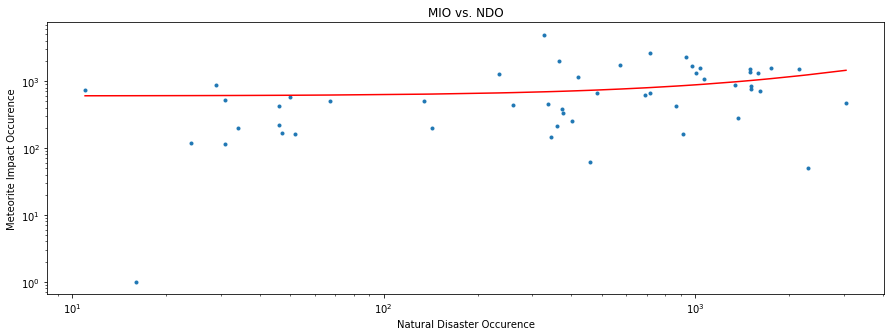

In [288]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

def graph(x, y):
    plt.figure(figsize=(15,5))
    plt.loglog(df_final[x], df_final[y], '.')
    return (df_final[x], df_final[y])
    
# scatter plot ndo vs mio
x, y = graph('mio', 'ndo')
plt.xlabel('Natural Disaster Occurence')
plt.ylabel('Meteorite Impact Occurence')
plt.title('MIO vs. NDO')

# P-values
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.pvalues)

# building a model
fit = np.polyfit(x, y, deg=1)
plot_x = x.sort_values(ascending=True)
plt.plot(plot_x, fit[0]*plot_x + fit[1], color='red') #add reg line

plt.show()

### Fit a Simple Linear Regression: NDO vs. Max_Count

const        0.000003
max_count    0.865553
dtype: float64


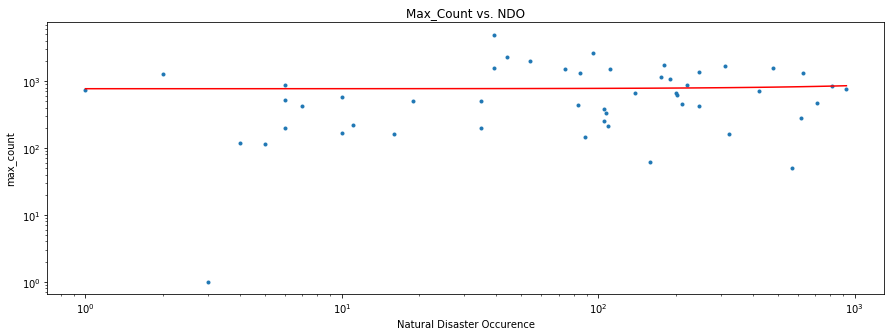

In [289]:
# scatter plot ndo vs max_count
x,y = graph('max_count', 'ndo')
plt.xlabel('Natural Disaster Occurence')
plt.ylabel('max_count')
plt.title('Max_Count vs. NDO')

# P-values
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.pvalues)

# building a model
fit = np.polyfit(x, y, deg=1)
plot_x = x.sort_values(ascending=True)
plt.plot(plot_x, fit[0]*plot_x + fit[1], color='red') # add reg line

plt.show()

### Fit a Simple Linear Regression: NDO vs. Avg_Mass

const       9.162708e-09
avg_mass    1.216822e-01
dtype: float64


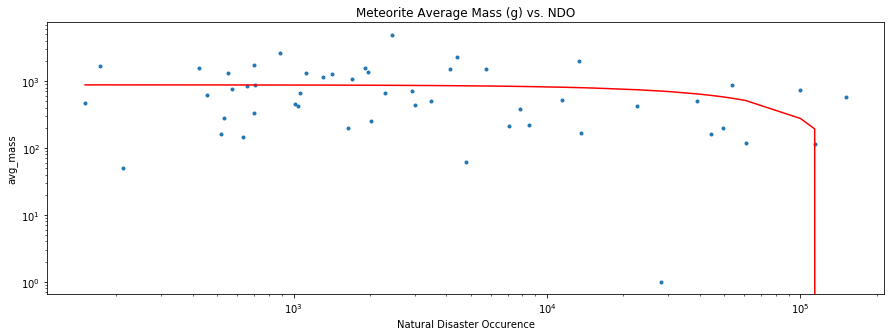

In [290]:
# scatter plot ndo vs avg_mass
x,y = graph('avg_mass', 'ndo')
plt.xlabel('Natural Disaster Occurence')
plt.ylabel('avg_mass')
plt.title('Meteorite Average Mass (g) vs. NDO')

# P-values
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.pvalues)

# building a model
fit = np.polyfit(x, y, deg=1)
plot_x = x.sort_values(ascending=True)
plt.plot(plot_x, fit[0]*plot_x + fit[1], color='red') # add reg line

plt.show()

### Fit a Simple Linear Regression: NDO vs. Max_Mass

const       6.414412e-07
max_mass    8.066910e-01
dtype: float64


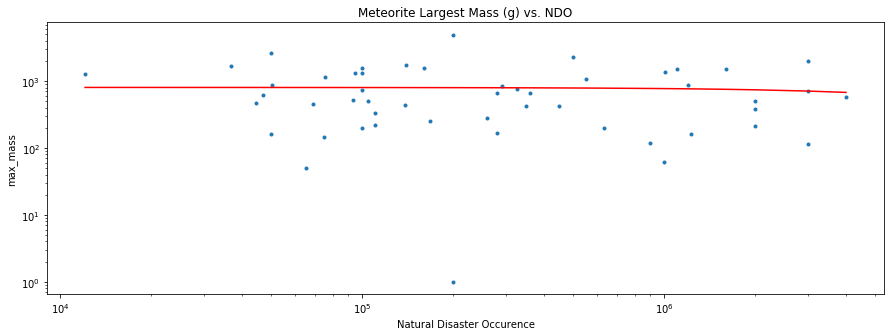

In [291]:
# scatter plot ndo vs max_mass
x,y = graph('max_mass', 'ndo')
plt.xlabel('Natural Disaster Occurence')
plt.ylabel('max_mass')
plt.title('Meteorite Largest Mass (g) vs. NDO')

# P-values
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.pvalues)

# building a model
fit = np.polyfit(x, y, deg=1)
plot_x = x.sort_values(ascending=True)
plt.plot(plot_x, fit[0]*plot_x + fit[1], color='red') # add reg line

plt.show()

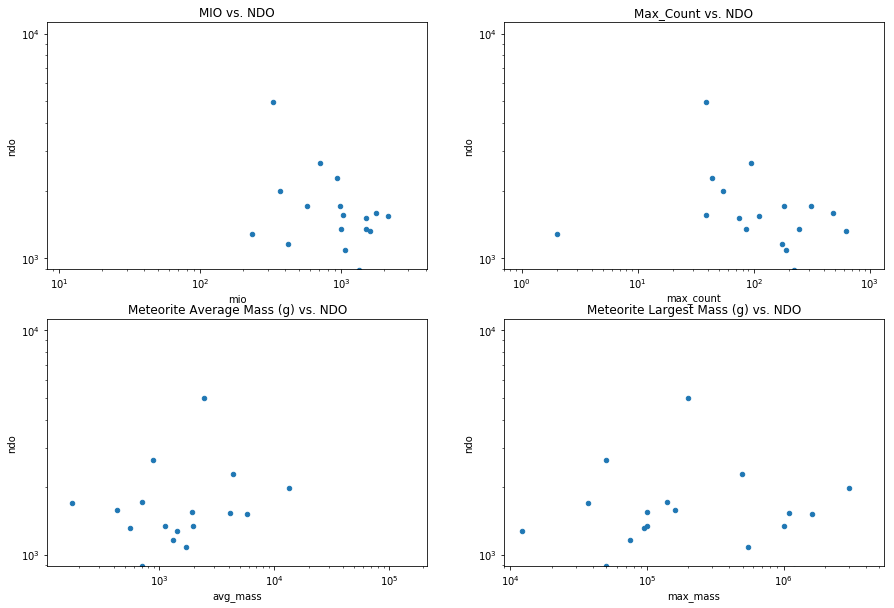

In [292]:
fig, axs = plt.subplots(2,2)

df_final.plot(ax=axs[0][0], x='mio', y='ndo', kind='scatter', title='MIO vs. NDO', figsize=(15,10), loglog=True)
df_final.plot(ax=axs[0][1], x='max_count',y='ndo', kind='scatter', title='Max_Count vs. NDO', loglog=True)
df_final.plot(ax=axs[1][0], x='avg_mass', y='ndo', kind='scatter', title='Meteorite Average Mass (g) vs. NDO', loglog=True)
df_final.plot(ax=axs[1][1], x='max_mass', y='ndo', kind='scatter', title="Meteorite Largest Mass (g) vs. NDO", loglog=True)

## Multiple Regression

In [374]:
x1 = df_final['mio']
x2 = df_final['max_count']
x3 = df_final['avg_mass']
x4 = df_final['max_mass']
_x = []

for i,j,k,m in zip(x1, x2, x3, x4):
    _x.append([1,i,j,k,m])
    
# multi regression summary
x = _x
y = df_final['ndo']

fit = ols('y ~ 1 + mio + max_count + avg_mass + max_mass', data = df_final).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     1.876
Date:                Mon, 03 Dec 2018   Prob (F-statistic):              0.129
Time:                        16:06:46   Log-Likelihood:                -445.31
No. Observations:                  55   AIC:                             900.6
Df Residuals:                      50   BIC:                             910.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    723.3267    195.765      3.695      0.001     330.121    1116.533
mio            0.5436      0.269      2.022      0.049       0.004       1.084
max_count     -1.4475      0.804     -1.801      0.078      -3.062       0.167
avg_mass      -0.0055      0.005     -1.068      0.291      -0.016       0.005
max_mass    5.496e-05      0.000      0.355      0.724      -0.000       0.000
==============================================================================
Omnibus:                       56.629   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.412
Skew:                           2.733   Prob(JB):                     4.92e-77
Kurtosis:                      14.112   Cond. No.                     1.92e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [372]:
# beta = np.array([723.3267, 0.5436, -1.4475, -0.0055, 5.496e-05])
# y = np.dot(x, beta)

# plt.scatter(y, df_final['ndo'], s=15)
# plt.xlabel('yhat')
# plt.ylabel('ndo')